#### we gonna apply k_fold cross validation on the kernel svm model that we built in the classification part

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


our prediction for the the purchased category will be based on the age and the salary of the client

In [4]:
len(dataset)

400

### Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
print('lenght of the train set is:' + str(len(X_train)))
print('lenght of the test set is:' + str(len(X_test)))

lenght of the train set is:300
lenght of the test set is:100


### Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Fitting classifier to the Training set
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [8]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state=0) ## gaussian kernel, we could ve chosen the linear kernel to get something like
                                                             ## the logistic regression
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [10]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [11]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [12]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [13]:
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

#### very good, not bad at all (3+4=7 wrong predictions) comparing to logistic regression (11 incorrect predictions)

## K_Fold CROSS VALIDATION:  Evaluating model's performance
https://scikit-learn.org/0.18/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

###### it will return 10 accuracies of 10 combination that will be created from training set
###### each combination is composed of 9 fold to train the model and one to test it

In [16]:
from sklearn.model_selection import  cross_val_score

In [17]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10 ) #cv cross-validation splitting strategy.

In [18]:
accuracies

array([0.80645161, 0.96666667, 0.8       , 0.93333333, 0.86666667,
       0.83333333, 0.93333333, 0.93333333, 0.96666667, 0.96551724])

when we test our model on one test set, we get an accuracy, we get an another when we test it on a nother test set, so evaluating on one test set isn't very relevant. here we got 10 accuracies, we will take the mean and have a much better idea on our model's performance

In [19]:
accuracies.mean()

0.9005302187615868

so 90% is the relevent accuracy of our model, we gonna compute also the standard deviation to push the analysis further, to see if there is a high or low variance

In [20]:
accuracies.std()

0.06388957356626285

###### 6% is the avergae of the differences between the different accuracies that we'll get when evaluating our model performance and the average accuracy that is 90%.
###### So that's actually not too high variance.
###### That's OK because that means that when we evaluate our model's performance while most of the time will be around 84% and 96%, so eventually that means that we are in the low bias and no variance category

## GRID SEARCH:  Improving model's performance
###### choose optimal values for hyperparameters, which model and algo I should choose
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [21]:
from sklearn.model_selection import  GridSearchCV

In [22]:
parameters =[{ 'C': [1, 10, 100, 1000], 'kernel': ['linear']}, 
             { 'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.5, 0.1, 0.01, 0.001, 0.0001]}]

In [23]:
grid_search = GridSearchCV(estimator = classifier, 
                           param_grid = parameters, 
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [24]:
grid_search = grid_search.fit(X_train, y_train)

In [28]:
best_accuracy = grid_search.best_score_
best_accuracy  ## average of 10 accuracies

0.9

In [30]:
best_parameters = grid_search.best_params_
best_parameters

{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}

###### choose another value for gamma to be more precise

In [31]:
parameters =[{ 'C': [1, 10, 100, 1000], 'kernel': ['linear']}, 
             { 'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8]}]
grid_search = GridSearchCV(estimator = classifier, 
                           param_grid = parameters, 
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [42]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print('best accuracy is: ' + str(best_accuracy) + ', and best parameters are: ' + str(best_parameters))


best accuracy is: 0.9033333333333333, and best parameters are: {'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}


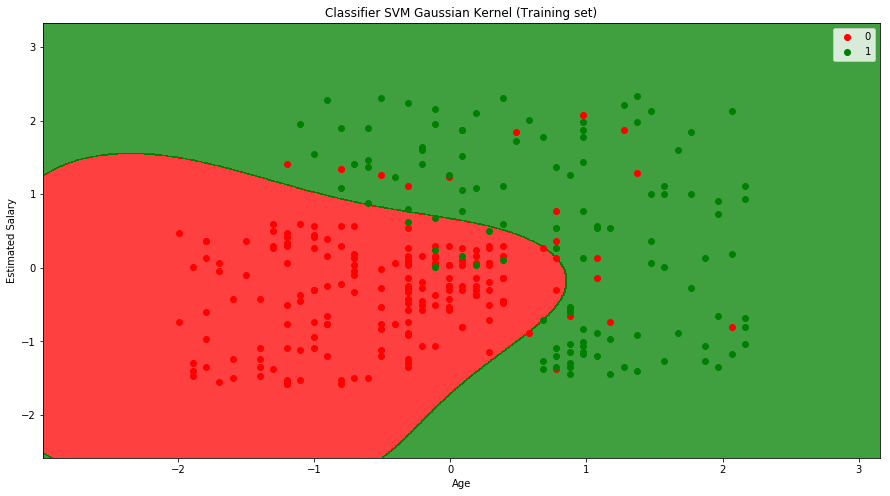

In [14]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize=(15,8))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier SVM Gaussian Kernel (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

well it looks like a boundary of an ocean, not a straight line like in the logistic regression classifier. 

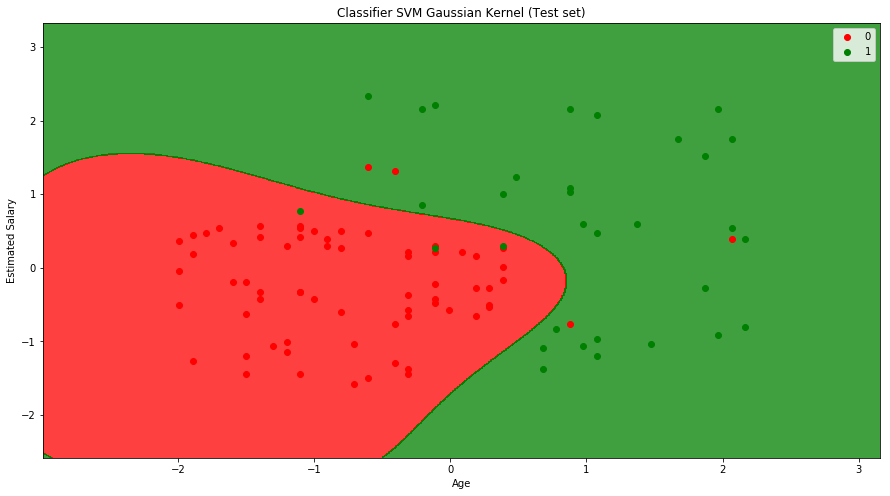

In [15]:
# Visualising the Test set results

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize=(15,8))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier SVM Gaussian Kernel (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

as the SVM is a nonlinear classifier (guassian kernel), we made a great job more than the logistic classifier and the linear kernel using svm.however, we still have some wrong predictions, but that's okey, our model (parameters) was established to avoid the overfitting, but it's actually a great model we got here. 